Лабораторная №4

Поиск нечетких дубликатов

In [112]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from thefuzz import fuzz

Используемые библиотеки:

os: Модуль os в Python предоставляет возможность использовать функциональность, зависящую от операционной системы  и управление файлами. 

collections: Модуль предоставляет альтернативы встроенным контейнерным типам данных, таким как списки, словари и кортежи. defaultdict.

matplotlib.pyplot: это набор функций командного стиля, которые заставляют Matplotlib работать как MATLAB.

thefuzz: это библиотека для сопоставления строк, которая является развитием старой библиотеки FuzzyWuzzy. Она используется для сравнения строк и определения того, насколько они похожи друг на друга. 

In [113]:
# To read documents
def load_documents(path):
    texts = []
    for filename in os.listdir(path):
        if filename.endswith(".txt"):
            with open(os.path.join(path, filename), 'r', encoding='utf-8') as file:
                texts.append((filename, file.read()))
    return texts

Тексты Источник: https://m.imdb.com/chart/top/ 


Функция считывает все текстовые файлы из указанного каталога, загружая содержимое и имя каждого файла в список кортежей.

In [114]:
# Common phrases between two texts
def find_common_phrases(text1, text2, n=5):
    words1 = text1.split()
    words2 = text2.split()
    common = set(words1) & set(words2)
    phrases = []
    for word in common:
        if text1.count(word) > 1 and text2.count(word) > 1: 
            phrases.append(word)
    return phrases[:n]

n = топ общих слов

Функция сравнивает две текстовые строки, чтобы определить и вернуть список общих слов, которые встречаются в обоих текстах более одного раза. Она разбивает тексты на слова, находит пересечение этих множеств, чтобы получить общие слова, и проверяет частоту встречаемости каждого общего слова в обоих текстах.

In [115]:
# Load documents
path_to_documents = "/home/sohiab/Desktop/GitHubProjects/InformationRetrievalSystems/Lab4"
documents = load_documents(path_to_documents)

# Finding fuzzy duplicates
clusters = defaultdict(list)
threshold = 50  # fuzz similarity

for i in range(len(documents)):
    for j in range(i + 1, len(documents)):
        fuzz_score = fuzz.token_sort_ratio(documents[i][1], documents[j][1])
        if fuzz_score > threshold:
            common_phrases = find_common_phrases(documents[i][1], documents[j][1])
            clusters[f"Cluster {len(clusters) + 1}"].append((documents[i][0], documents[j][0], fuzz_score, common_phrases))

Загрузка документов

Код выявляет «нечеткие дубликаты» среди документов, сравнивая их текстовое содержимое с помощью fuzz.token_sort_ratio. Документы, которые превышают порог сходства, группируются в кластеры, а также определяются общие фразы между каждой парой. Каждый кластер содержит пары документов, которые считаются похожими, что повышает эффективность управления и анализа контента.


In [116]:
# Print and save results to a text file
with open("fuzzy_duplicates_results.txt", "w") as file:
    file.write("Кластеры нечетких дубликатов документов и общих фраз:\n")
    for cluster, docs in clusters.items():
        print(f"{cluster}:")
        file.write(f"{cluster}:\n")
        for doc in docs:
            print(f"  - Documents: {doc[0]} and {doc[1]}, Fuzzy Similarity: {doc[2]}, Common Phrases: {doc[3]}")
            file.write(f"  - Documents: {doc[0]} and {doc[1]}, Fuzzy Similarity: {doc[2]}, Common Phrases: {doc[3]}\n")

Cluster 1:
  - Documents: doc4.txt and doc6.txt, Fuzzy Similarity: 54, Common Phrases: ['and', 'in', 'on']
Cluster 2:
  - Documents: doc4.txt and doc3.txt, Fuzzy Similarity: 65, Common Phrases: ['family', 'of', 'and', 'the']
Cluster 3:
  - Documents: doc4.txt and doc1.txt, Fuzzy Similarity: 53, Common Phrases: ['the']
Cluster 4:
  - Documents: doc6.txt and doc3.txt, Fuzzy Similarity: 62, Common Phrases: ['is', 'a', 'and', 'to']
Cluster 5:
  - Documents: doc6.txt and doc2.txt, Fuzzy Similarity: 52, Common Phrases: ['The', 'is', 'a', 'and']
Cluster 6:
  - Documents: doc6.txt and doc5.txt, Fuzzy Similarity: 52, Common Phrases: ['The', 'is', 'a', 'and', 'to']
Cluster 7:
  - Documents: doc3.txt and doc5.txt, Fuzzy Similarity: 51, Common Phrases: ['is', 'a', 'and', 'to', 'the']
Cluster 8:
  - Documents: doc3.txt and doc1.txt, Fuzzy Similarity: 51, Common Phrases: ['a', 'to', 'the']
Cluster 9:
  - Documents: doc2.txt and doc5.txt, Fuzzy Similarity: 64, Common Phrases: ['The', 'is', 'a', 'and'

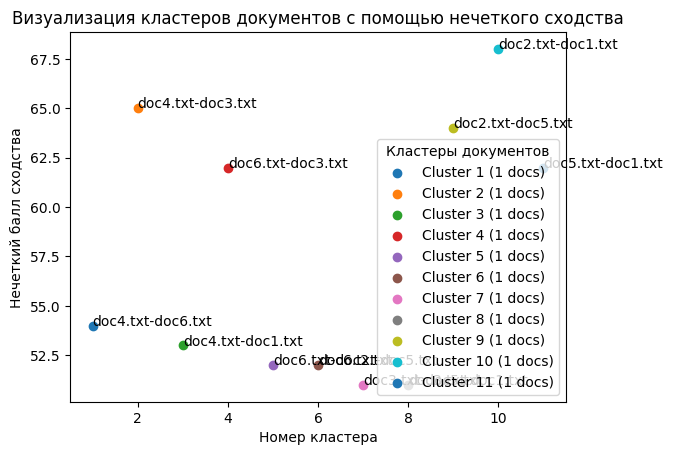

In [117]:
# Visualization
fig, ax = plt.subplots()
for i, (cluster, docs) in enumerate(clusters.items(), 1):
    x = [i] * len(docs)
    y = [doc[2] for doc in docs] 
    ax.scatter(x, y, label=f"{cluster} ({len(docs)} docs)")
    for doc in docs:
        ax.annotate(f"{doc[0]}-{doc[1]}", (i, doc[2]))

ax.set_title('Визуализация кластеров документов с помощью нечеткого сходства')
ax.set_xlabel('Номер кластера')
ax.set_ylabel('Нечеткий балл сходства')
ax.legend(title="Кластеры документов", loc='lower right')
plt.show()